## Step 1: Load Packages and Libraries

In [2]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

from sklearn.metrics.pairwise import cosine_similarity # Find how similar the rows are to each other
from sklearn.feature_extraction.text import TfidfVectorizer # Convert text data into numerical features


import os
from scipy.sparse import coo_matrix # Store only non-zero values to save space

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Data Loading and Preprocessing

In [4]:
train_data=pd.read_csv("marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.csv")

In [5]:
train_data.head()

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


## Basic operations

In [7]:
train_data.shape

(5000, 32)

In [8]:
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [9]:
## removing unnecessary columns
train_data=train_data.drop(columns=['Crawl Timestamp', 'Dataset Origin', 'Product Barcode', 'Product Company Type Source', 'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type', 'Retailer', 'Product Price', 'Sku', 'Upc', 'Product Url', 'Market', 'Product Currency',
       'Product Available Inventory', 'Product Model Number', 'Product Model Number', 'Product Contents', 'Bsr', 'Joining Key'], axis=1)

In [10]:
train_data.shape

(5000, 10)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                5000 non-null   object 
 1   Product Id             5000 non-null   object 
 2   Product Category       4990 non-null   object 
 3   Product Brand          4987 non-null   object 
 4   Product Name           5000 non-null   object 
 5   Product Description    3873 non-null   object 
 6   Product Image Url      5000 non-null   object 
 7   Product Tags           5000 non-null   object 
 8   Product Rating         2194 non-null   float64
 9   Product Reviews Count  3346 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


In [12]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Category           10
Product Brand              13
Product Name                0
Product Description      1127
Product Image Url           0
Product Tags                0
Product Rating           2806
Product Reviews Count    1654
dtype: int64

In [13]:
# Fill missing values in 'Product Category' with an empty string
train_data['Product Category'].fillna('', inplace=True)
# Fill missing values in 'Product Brand' with an empty string
train_data['Product Brand'].fillna('', inplace=True)
# Fill missing values in 'Product Description' with an empty string
train_data['Product Description'].fillna('', inplace=True)
# Fill missing values in 'Product Rating' with a default value (e.g., 0)
train_data['Product Rating'].fillna(0, inplace=True)
# Fill missing values in 'Product Reviews Count' with a default value (e.g., 0)
train_data['Product Reviews Count'].fillna(0, inplace=True)

In [14]:
train_data.isnull().sum()

Uniq Id                  0
Product Id               0
Product Category         0
Product Brand            0
Product Name             0
Product Description      0
Product Image Url        0
Product Tags             0
Product Rating           0
Product Reviews Count    0
dtype: int64

In [15]:
train_data.duplicated().sum()

0

In [16]:
# make columns shorter
# Define the mapping of current column names to shorter names
column_name_mapping={
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}

# Rename the columns using the mapping
train_data.rename(columns=column_name_mapping, inplace=True)

In [17]:
train_data.head()

,ID,ProdID,Category,Brand,Name,Description,ImageURL,Tags,Rating,ReviewCount
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,0.0
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",Pack of 3 Pack of 3 for the UPC: 381519000201 ...,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",0.0,0.0
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,This Clairol Nice N Easy Permanent Color gives...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5,29221.0
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",Calling all matte lip lovers! Indulge in our r...,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,0.0
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","In 1971, Gillette introduced the Trac II razor...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",0.0,131.0


In [18]:
train_data['ID']=train_data['ID'].str.extract(r'(\d+)').astype(float)
train_data['ProdID']=train_data['ProdID'].str.extract(r'(\d+)').astype(float)

## Step 3: EDA (Exploratory Data Analysis)

In [20]:
pal = ['#ea698b','#d55d92','#c05299','#ac46a1','#ac46a1','#822faf','#6d23b6','#6411ad','#571089','#47126b']

In [21]:
# Basic statistics
num_users=train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 1721
Number of unique items: 1697
Number of unique ratings: 36


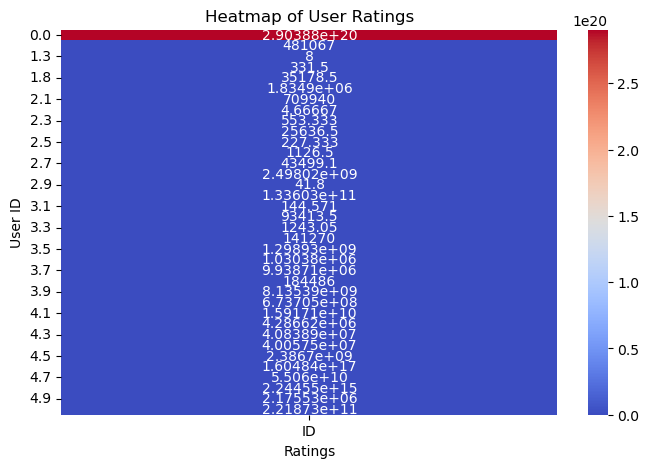

In [22]:
# Pivot the DataFrame to create a heatmap
heatmap_data = train_data.pivot_table('ID', 'Rating')

# Create the heatmap
plt.figure(figsize=(8,5))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

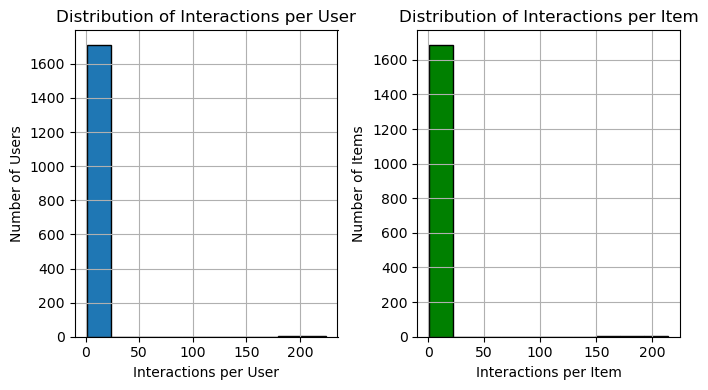

In [23]:
# Distribution of interactions
plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Most users interact with only a few items, while a small number of users and items have high interaction counts, illustrating the long tail effect in user behavior and item popularity

Text(0.5, 1.0, 'Most Popular items')

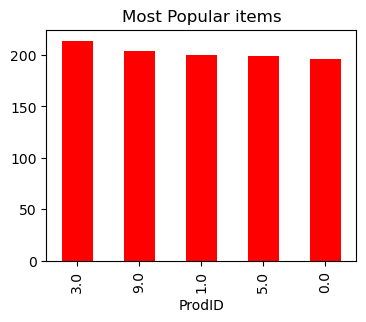

In [25]:
# Most popular items
plt.figure(figsize=(4, 3))
popular_items = train_data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title("Most Popular items")

Product ID 3.0 is the most popular item, with the highest number of interactions among all products.

<Axes: xlabel='Rating'>

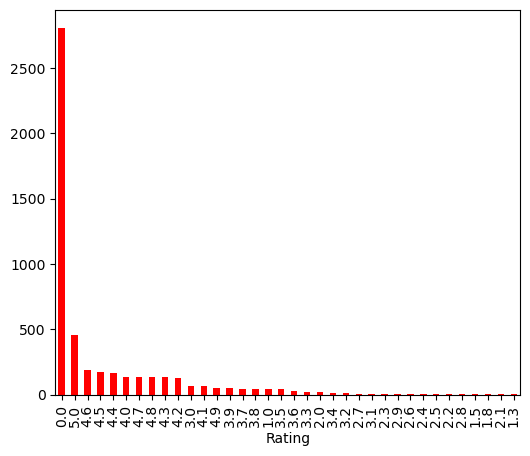

In [27]:
# most rated counts
plt.figure(figsize=(6, 5))
train_data['Rating'].value_counts().plot(kind='bar',color='red')

## Step 4: Data Cleaning and Tags Creations

In [29]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

In [30]:
train_data.head()

,ID,ProdID,Category,Brand,Name,Description,ImageURL,Tags,Rating,ReviewCount
0,1.705737e+09,2.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,0.0
1,9.500000e+01,76.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...","pack, 3, pack, 3, upc, 381519000201, beautiful...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",0.0,0.0
2,8.000000e+00,8.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,"clairol, nice, n, easy, permanent, color, give...",https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5,29221.0
3,4.000000e+00,3.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...","calling, matte, lip, lovers, indulge, rich, cr...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,0.0
4,9.900000e+02,3.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","1971, gillette, introduced, trac, ii, razor, s...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",0.0,131.0


## Rating Base Recommendations System

In [32]:
#Finding top 10 ratings 
average_ratings=train_data.groupby(['Name', 'ReviewCount', 'Brand', 'ImageURL'])['Rating'].mean().reset_index()

In [33]:
top_rated_items=average_ratings.sort_values(by='Rating', ascending=False)

rating_base_recommendation=top_rated_items.head(10)

In [34]:
# Converting Rating and ReviewCount from float to integer
rating_base_recommendation['Rating']=rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount']=rating_base_recommendation['ReviewCount'].astype(int)
rating_base_recommendation.head()

,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2,"gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...,5
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5


## Content Base Recommendation system (User Preferences or Items similarities)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer=TfidfVectorizer(stop_words='english')
tfidf_matrix_content=tfidf_vectorizer.fit_transform(train_data['Tags'])
cosine_similarity_content=cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [37]:
cosine_similarity_content

array([[1.        , 0.01317493, 0.01182614, ..., 0.10132348, 0.01249521,
        0.04414909],
       [0.01317493, 1.        , 0.40297257, ..., 0.00605861, 0.01205174,
        0.04258219],
       [0.01182614, 0.40297257, 1.        , ..., 0.03722526, 0.01081794,
        0.03822285],
       ...,
       [0.10132348, 0.00605861, 0.03722526, ..., 1.        , 0.00574604,
        0.02030237],
       [0.01249521, 0.01205174, 0.01081794, ..., 0.00574604, 1.        ,
        0.04038529],
       [0.04414909, 0.04258219, 0.03822285, ..., 0.02030237, 0.04038529,
        1.        ]])

In [38]:
# recommending products based on Nail Polish
item_name='OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index=train_data[train_data['Name']==item_name].index[0]

In [39]:
similar_items=list(enumerate(cosine_similarity_content[item_index]))

In [40]:
# top 10 similar items of Nail Polish
similar_items=sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items=similar_items[1:10]

recommended_items_indics=[x[0] for x in top_similar_items]
recommended_items_indics

[4854, 3052, 4010, 4752, 4356, 3967, 2952, 4966, 3252]

In [41]:
train_data.iloc[recommended_items_indics][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
4854,"OPI Infinite Shine Nail Polish, Dulce De Leche...",1.0,opi
3052,"OPI Nail Lacquer Nail Polish, Hawaiian Orchid",1.0,opi
4010,"OPI Nail Polish, Are We There Yet?, 0.5 Fl Oz",2.0,opi
4752,"OPI Infinite Shine Nail Polish, Let Love Spark...",3.0,opi
4356,"OPI Nail Lacquer Nail Polish, Go with the Lava...",1.0,opi
3967,"OPI Infinite Shine Nail Polish, Mini Scotland ...",1.0,opi
2952,"OPI Nail Lacquer Nail Polish, Miami Beet",0.0,opi
4966,OPI Nail GelColor + Infinite Shine Polish -TAU...,0.0,opi
3252,"OPI Nail Lacquer Nail Polish, Shorts Story",1.0,opi


## Function To Recommend Products for Content Base

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True) 
    
    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details


In [44]:
# Example: Get content-based recommendations for a specific item (Nail Polish)
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
4854,"OPI Infinite Shine Nail Polish, Dulce De Leche...",1.0,opi,https://i5.walmartimages.com/asr/466527fe-9e5e...,5.0
3052,"OPI Nail Lacquer Nail Polish, Hawaiian Orchid",1.0,opi,https://i5.walmartimages.com/asr/cef5a3ca-dfed...,4.0
4010,"OPI Nail Polish, Are We There Yet?, 0.5 Fl Oz",2.0,opi,https://i5.walmartimages.com/asr/bb0c5e20-0ead...,3.0
4752,"OPI Infinite Shine Nail Polish, Let Love Spark...",3.0,opi,https://i5.walmartimages.com/asr/7eef48ac-3a28...,4.0
4356,"OPI Nail Lacquer Nail Polish, Go with the Lava...",1.0,opi,https://i5.walmartimages.com/asr/6cd23e3d-f3be...,5.0
3967,"OPI Infinite Shine Nail Polish, Mini Scotland ...",1.0,opi,https://i5.walmartimages.com/asr/b673df9d-cc73...,0.0
2952,"OPI Nail Lacquer Nail Polish, Miami Beet",0.0,opi,https://i5.walmartimages.com/asr/083f9170-da65...,0.0
4966,OPI Nail GelColor + Infinite Shine Polish -TAU...,0.0,opi,https://i5.walmartimages.com/asr/a364a6d7-0cd1...,0.0


In [45]:
# Example: Get content-based recommendations for a specific item (Lipstick)
item_name = 'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,0.0
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
3023,Be Matte Lipstick - Pink,2.0,"city, color",https://i5.walmartimages.com/asr/4425a13e-085f...,3.0
558,"Kokie Professional Nail Polish, Girls Night , ...",6.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/a6f6da7a-cb11...,4.2
4920,"Kokie Professional Nail Polish, Jamacan Me Blu...",6.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/16fc0e60-1c66...,4.2
3620,"Kokie Professional Skin Perfect HD Foundation,...",9.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/2f8fcaa9-7db7...,0.0


## Collaborative Filtering(User Item Similarity)

In [105]:
user_item_matrix=train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0).astype(int)
user_item_matrix

ProdID,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,...,1.007940e+42,1.007940e+42,1.008730e+42,1.030521e+42,1.030521e+42,1.030521e+42,1.076430e+42,3.002240e+42,5.002240e+42,5.005509e+42
ID,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,2,1,2,1,1,0,2,1,1,1,...,0,0,0,0,0,0,5,0,0,0
1.000000e+00,1,0,2,2,0,2,3,2,0,2,...,0,4,0,0,5,0,0,0,0,0
2.000000e+00,1,1,3,1,2,1,0,2,1,1,...,0,3,0,0,0,0,0,0,0,4
3.000000e+00,1,1,1,2,0,3,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4.000000e+00,3,0,2,1,1,1,0,2,1,3,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.967409e+13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.094514e+14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.007694e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
user_similarity=cosine_similarity(user_item_matrix)

In [101]:
target_user_id=4
target_user_index=user_item_matrix.index.get_loc(target_user_id)

In [103]:
user_similarities = user_similarity[target_user_index]

similar_user_indices = user_similarities.argsort()[::-1][1:]

In [107]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)
    
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImageURL','Rating']]

In [109]:
recommended_items_details.head(10)

,Name,ReviewCount,Brand,ImageURL,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",3.0,dentek,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,741.0,neutrogena,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,1.0,"design, essentials",https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
78,"Paul Sebastian Fine Cologne Spray, Cologne for...",28.0,"paul, sebastian",https://i5.walmartimages.com/asr/03d08a07-18d7...,4.8
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
92,"Bytewise Organic Moringa Leaf Powder, 12 Oz",0.0,bytewise,https://i5.walmartimages.com/asr/076f2b3f-fdc3...,0.0
94,Ag Hair Cosmetics Ultradynamics Extra-Firm Fin...,0.0,"ag, hair",https://i5.walmartimages.com/asr/5d217d98-a385...,0.0
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0


## Function That Recommend Items

In [118]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = {}

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user > 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs and their ratings
        for item_id, rating in rated_by_similar_user[not_rated_by_target_user].items():
            if item_id not in recommended_items:
                recommended_items[item_id] = rating
            else:
                recommended_items[item_id] += rating

    # Sort the recommended items by their aggregated ratings
    sorted_recommended_items = sorted(recommended_items.items(), key=lambda x: x[1], reverse=True)

    # Get the top N recommended items
    top_recommended_items = [item[0] for item in sorted_recommended_items[:top_n]]

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['ProdID'].isin(top_recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details.head(top_n)

In [120]:
# Example usage
target_user_id = 4
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id, top_n)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 4:


,Name,ReviewCount,Brand,ImageURL,Rating
48,Sexy Hair Concepts Healthy Sexy Hair Tri-Wheat...,10.0,"sexy, hair",https://i5.walmartimages.com/asr/125be654-1d2d...,4.6
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
174,COVERGIRL Outlast All-Day Moisturizing Lip Col...,36.0,covergirl,https://i5.walmartimages.com/asr/4479896f-c6c4...,0.0
196,"RepHresh Pro-B Probiotic Supplement for Women,...",5424.0,rephresh,https://i5.walmartimages.com/asr/d4600e4f-340c...,4.1
247,Joico 4048340 By Joico Joifix Firm Finishing S...,0.0,joico,https://i5.walmartimages.com/asr/7142f118-815b...,0.0


## Hybrid Recommendations

In [123]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)
    
    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()
    
    return hybrid_rec.head(10)

In [125]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4 # Change this to the user_id you want recommendations for
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"  # Change this to the item name
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
1215,OPI Nail Lacquer Polish .5oz/15mL - Put A Coat...,0.0,opi,https://i5.walmartimages.com/asr/b51a716d-565c...,0.0
545,OPI Nail Lacquer Polish .5oz/15mL - Sweet Hear...,0.0,opi,https://i5.walmartimages.com/asr/136eb3a3-1668...,0.0
3852,OPI Nail Lacquer Polish .5oz/15mL - A-taupe th...,1.0,opi,https://i5.walmartimages.com/asr/4b895a60-06c2...,0.0
1594,Nail Lacquer - # NL E74 Youre Such a BudaPest ...,5.0,opi,https://i5.walmartimages.com/asr/bb6e42b8-35ee...,5.0
4645,OPI Nail Lacquer Polish .5oz/15mL - Champagne ...,0.0,opi,https://i5.walmartimages.com/asr/5f4ec827-6edc...,0.0
4109,OPI Nail Lacquer Polish .5oz/15mL - Girls Love...,0.0,opi,https://i5.walmartimages.com/asr/6d70f6db-0442...,0.0
4310,OPI Nail Lacquer Polish .5oz/15mL - So Many Cl...,0.0,opi,https://i5.walmartimages.com/asr/b24090e9-9cf9...,0.0
3719,OPI Nail Lacquer Polish .5oz/15mL - Ski Slope ...,0.0,opi,https://i5.walmartimages.com/asr/8466cc9b-40da...,0.0
4010,"OPI Nail Polish, Are We There Yet?, 0.5 Fl Oz",2.0,opi,https://i5.walmartimages.com/asr/bb0c5e20-0ead...,3.0
3052,"OPI Nail Lacquer Nail Polish, Hawaiian Orchid",1.0,opi,https://i5.walmartimages.com/asr/cef5a3ca-dfed...,4.0
